# Davis Franklin

## Research Question #1

**I would like to further investigate Apple's market capitalization by specifically looking at the effect that the release of a new iPhone has on Apple's market value. I would like to analyze weather the market responds positively or negatively to the release of each iPhone and how much the stock value is impacted.** From this, I hope to determine which iPhone had the largest positive impact and which iPhone had the largest negative impact on Apple's stock value.

---
## Research Question #2
**To discover what iPhone release month has the greatest positive impact on Apple's market value.** I would like to see if apples yearly september release is justified or if Apple has success with releasing iPhones at different times of the year.

---
## Action Plan
I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer these research question by using an additional dataset that includes the release dates of all the iPhones. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times.

## Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import calendar
import datetime

import sys
sys.path.append('/Users/davisfranklin/Desktop/UBCO/DATA301/project-group-group11/analysis/code')
from functions_analysis1 import process

sns.set_theme(style="ticks", font_scale=1)
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### Loading Data:

In [2]:
stocks_df = pd.read_csv("../data/raw/AAPL_stock.csv")
iPhone_df = pd.read_csv("../data/raw/iPhones.csv")

---
### Data Understanding: 
In this step I inspect the two datasets to further understand, and discover what parts need to cleaned or processed. 

### For stocks_df:

In [3]:
stocks_df.shape

(10443, 7)

In [4]:
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
stocks_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [7]:
stocks_df.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For iPhone_df:

In [8]:
iPhone_df.shape

(37, 2)

In [9]:
iPhone_df.head()

,iPhone,Release_Date
0,iPhone 1st Gen,2007-01-09
1,iPhone 3G,2008-05-09
2,iPhone 3Gs,2009-05-08
3,iPhone 4,2010-05-07
4,iPhone 4S,2011-10-04


In [10]:
iPhone_df.dtypes

iPhone          object
Release_Date    object
dtype: object

In [11]:
iPhone_df.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,2022-09-07
freq,1,4


In [12]:
first_iPhone = iPhone_df['Release_Date'].min()
print(f"The first iPhone was released n: {first_iPhone}")

newest_iPhone = iPhone_df['Release_Date'].max()
print(f"The newest iPhone was released on: {newest_iPhone}")

The first iPhone was released n: 2007-01-09
The newest iPhone was released on: 2022-09-07


---
## Data Processing/Wrangling/Cleaning:

I use the process function to: 
* Merge the stock and iphone datasets to create one dataset with all the required data.
* Remove unneeded columns: High, Low, Open, Close, and Volume.
* Add the change column: change = Close - Open.
* Remove unneeded rows: rows before 2000-01-01.
* Converted the dates to datetime objects.
* Renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces)

In [13]:
df = process("../data/raw/AAPL_stock.csv", "../data/raw/iPhones.csv")

* Next I create a groupby object that contains the number of iphones released in each month

In [14]:
release_counts_month = df.groupby(df['Date'].dt.month)['iPhone'].count()
release_counts_month = release_counts_month[release_counts_month != 0]

* saving the final dataframe as a csv file

In [15]:
df.to_csv('../data/processed/analysis1_final.csv')

---
## Data Visualizations:

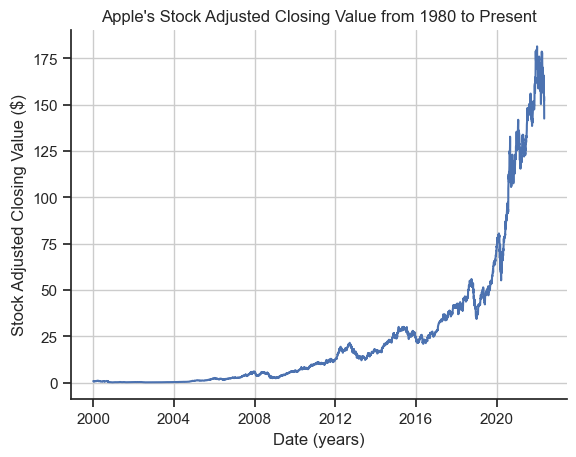

In [16]:
sns.lineplot(x='Date', y='Adj_Close', data=df)
plt.title("Apple's Stock Adjusted Closing Value from 1980 to Present")
plt.ylabel("Stock Adjusted Closing Value ($)")
plt.xlabel("Date (years)")
plt.grid(True)
plt.show()

This plot shows an overview of how Apple's stock value has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value was low until the release of the first iPhone where the stock value began to increase rapidly. Further analysis is needed to look at specific time frames to conclude which iPhones were sucesses for Apple.

Now taking a closer look at the pervious plot, specifically, looking at each day an iPhone is released.

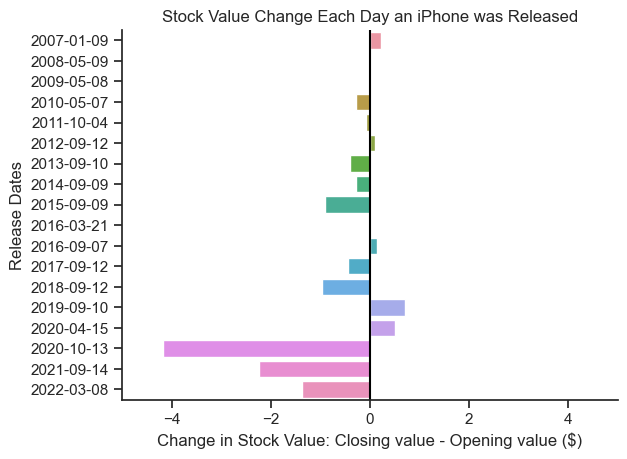

In [17]:
iphone_released_df = df[df['iPhone'].notnull()]
sns.barplot(y=iphone_released_df['Date'].dt.date, x='Change', data=iphone_released_df)
plt.title("Stock Value Change Each Day an iPhone was Released")
plt.xlim(-5, 5)
plt.xlabel("Change in Stock Value: Closing value - Opening value ($)")
plt.ylabel("Release Dates")
plt.axvline(x=0, color='black')
plt.show()

Now we can see exactly how the stock market reacted for the release of each iPhone. Here we can see that the release of iPhones have been more detrimental to Apple's stock values than successful. 

To give more context to the previous plot we can use the next table to see which iPhones where released on each day.

In [34]:
iPhone_df

,iPhone,Release_Date
0,iPhone 1st Gen,2007-01-09
1,iPhone 3G,2008-05-09
2,iPhone 3Gs,2009-05-08
3,iPhone 4,2010-05-07
4,iPhone 4S,2011-10-04
5,iPhone 5,2012-09-12
6,iPhone 5c,2013-09-10
7,iPhone 5s,2013-09-10
8,iPhone 6,2014-09-09
9,iPhone 6 Plus,2014-09-09


This table shows each iPhone and the date they were released. This table shows that the first iPhone was released in 2007, and Apple has released a new iPhone every year since 2007. Also, as time progresses Apple started to release more than one iPhone each year, with a maximum amount of iPhones released in 2020 where 5 phones were released.

---
## Answer RQ #1:
From the previous three plots we can now answer the first research question. The iPhone 12 group had the greatest negative impact on Apple's stock value and the iPhone 11 group had the greatest positive impact on Apple's stock value. Also, interestly Apple's first iPhone had a postive impact on the stock value, which seems strange for such a large and far fetched innovation for its time.

---

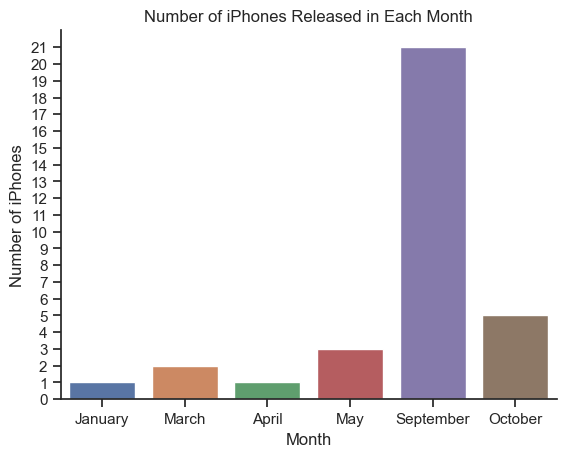

In [19]:
sns.barplot(x=[calendar.month_name[int(i)] for i in release_counts_month.index], y=release_counts_month.values)
plt.yticks(range(0, max(release_counts_month.values)+1, 1))
plt.ylabel("Number of iPhones")
plt.xlabel("Month")
plt.title("Number of iPhones Released in Each Month")
plt.show()

This plot shows which month iPhones have been released and the quantity of each month. iPhones have only been released in January, March, April, May, September, and October. September has the most phones released with 21 iPhones being released.

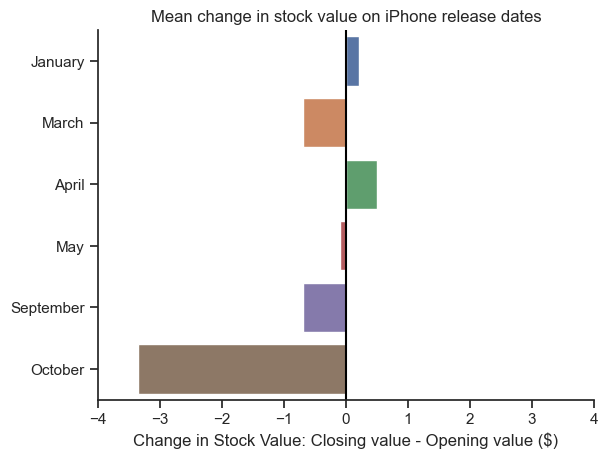

In [20]:
mean_change_by_month = iphone_released_df.groupby(iphone_released_df['Date'].dt.month)['Change'].mean()
sns.barplot(y=[calendar.month_name[i] for i in mean_change_by_month.index], x=mean_change_by_month.values)
plt.title("Mean change in stock value on iPhone release dates")
plt.xlabel("Change in Stock Value: Closing value - Opening value ($)")
plt.axvline(x=0, color='black')
plt.xlim(-4, 4)
plt.show()

This plot shows the average of how the stock market responds to iphone release in different months. From the plot October has the greatest negative effect on Apple's stock value and April having the largest positive effect.

---
## Answer RQ #2:
From the last two plots we can conclude that October is the worst month to release an iPhone. The average change in the stock market for the five iPhones released in October is around -3.2. Therefore, from the data Apple should stay away from releasing iPhones in October. On the contrary, January and April are the only months to have postive changes in the stock market. However, both of these months have only had one iPhone released, so we can not conclude with reasonable evidence that either of these months are benefitical to iPhone releases. Further, it is evident that no one month benefits Apple's iPhone release regarding the stock market. Also, for Apple's September release event, the data shows that it is fairly neutral. The change of the stock price in September is between negative one and zero, which is negligible. 

---

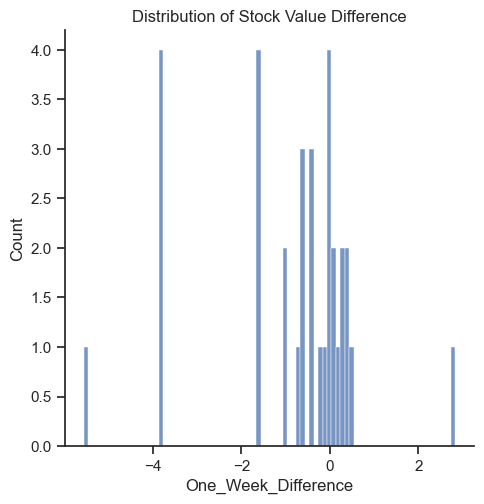

In [40]:
sns.displot(data=df[df['iPhone'].notnull()], x='One_Week_Difference', binwidth=0.1)
plt.title('Distribution of Stock Value Difference')
plt.show()

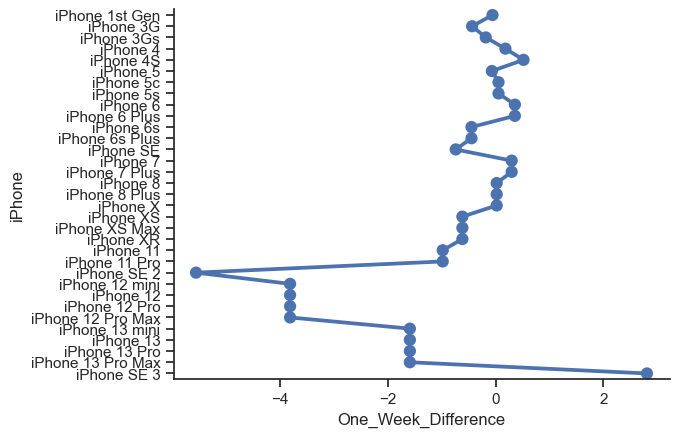

In [39]:
sns.pointplot(data=df[df['iPhone'].notnull()], x='One_Week_Difference', y='iPhone')
#plt.xticks(rotation=90)
plt.show()